<a href="https://colab.research.google.com/github/bhattijasjeet/Datascience_ai/blob/main/Employee_attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
# Import Libraries and Packages


# Data Maniplulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Data Modeling
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics and Helpful Functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, classification_report

# Saving Models
import pickle

In [53]:
# Data Loading

df0 = pd.read_csv("/content/drive/MyDrive/attrition/Employee_attrition.csv")

df0.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed


In [54]:
df0.info()
# 52685 - mid
# 30585 - entry
# 54656 - senior

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14900 entries, 0 to 14899
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               14900 non-null  int64 
 1   Age                       14900 non-null  int64 
 2   Gender                    14900 non-null  object
 3   Years at Company          14900 non-null  int64 
 4   Job Role                  14900 non-null  object
 5   Monthly Income            14900 non-null  int64 
 6   Work-Life Balance         14900 non-null  object
 7   Job Satisfaction          14900 non-null  object
 8   Performance Rating        14900 non-null  object
 9   Number of Promotions      14900 non-null  int64 
 10  Overtime                  14900 non-null  object
 11  Distance from Home        14900 non-null  int64 
 12  Education Level           14900 non-null  object
 13  Marital Status            14900 non-null  object
 14  Number of Dependents  

In [55]:
# Change dtypes of left, promotion_last_5years, Work_accident to boolean

df = df0.copy()
# df[["left", "promotion_last_5years", "Work_accident"]] = df[[
#     "left", "promotion_last_5years", "Work_accident"]].astype(bool)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14900 entries, 0 to 14899
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               14900 non-null  int64 
 1   Age                       14900 non-null  int64 
 2   Gender                    14900 non-null  object
 3   Years at Company          14900 non-null  int64 
 4   Job Role                  14900 non-null  object
 5   Monthly Income            14900 non-null  int64 
 6   Work-Life Balance         14900 non-null  object
 7   Job Satisfaction          14900 non-null  object
 8   Performance Rating        14900 non-null  object
 9   Number of Promotions      14900 non-null  int64 
 10  Overtime                  14900 non-null  object
 11  Distance from Home        14900 non-null  int64 
 12  Education Level           14900 non-null  object
 13  Marital Status            14900 non-null  object
 14  Number of Dependents  

In [56]:
df.duplicated().sum()

np.int64(0)

In [57]:
df.isnull().sum()

,0
Employee ID,0
Age,0
Gender,0
Years at Company,0
Job Role,0
Monthly Income,0
Work-Life Balance,0
Job Satisfaction,0
Performance Rating,0
Number of Promotions,0


In [58]:
df['Attrition'].value_counts(normalize=True) * 100

,proportion
Attrition,
Stayed,52.805369
Left,47.194631


In [59]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ['Attrition', 'Job Level','Job Satisfaction','Performance Rating','Company Reputation','Employee Recognition','Remote Work','Leadership Opportunities','Innovation Opportunities','Overtime']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [60]:
df
# 52685 - mid - 1
# 30585 - entry - 0
# 54656 - senior - 2

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,0,0,1,...,1,1,Large,22,0,0,0,3,2,1
1,30585,35,Male,7,Education,4563,Good,0,0,1,...,4,0,Medium,27,0,0,0,2,0,0
2,54656,50,Male,7,Education,5583,Fair,0,0,3,...,2,2,Medium,76,0,0,1,2,1,1
3,33442,58,Male,44,Media,5525,Fair,3,2,0,...,4,0,Medium,96,0,0,0,3,1,0
4,15667,39,Male,24,Education,4604,Good,0,0,0,...,6,1,Large,45,1,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,16243,56,Female,42,Healthcare,7830,Poor,2,0,0,...,0,2,Medium,60,0,0,0,3,2,1
14896,47175,30,Female,15,Education,3856,Good,2,0,2,...,0,0,Medium,20,0,0,0,2,2,0
14897,12409,52,Male,5,Education,5654,Good,3,1,0,...,4,1,Small,7,0,0,0,2,0,0
14898,9554,18,Male,4,Education,5276,Fair,0,0,0,...,3,1,Large,5,0,0,0,3,0,1


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14900 entries, 0 to 14899
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               14900 non-null  int64 
 1   Age                       14900 non-null  int64 
 2   Gender                    14900 non-null  object
 3   Years at Company          14900 non-null  int64 
 4   Job Role                  14900 non-null  object
 5   Monthly Income            14900 non-null  int64 
 6   Work-Life Balance         14900 non-null  object
 7   Job Satisfaction          14900 non-null  int64 
 8   Performance Rating        14900 non-null  int64 
 9   Number of Promotions      14900 non-null  int64 
 10  Overtime                  14900 non-null  int64 
 11  Distance from Home        14900 non-null  int64 
 12  Education Level           14900 non-null  object
 13  Marital Status            14900 non-null  object
 14  Number of Dependents  

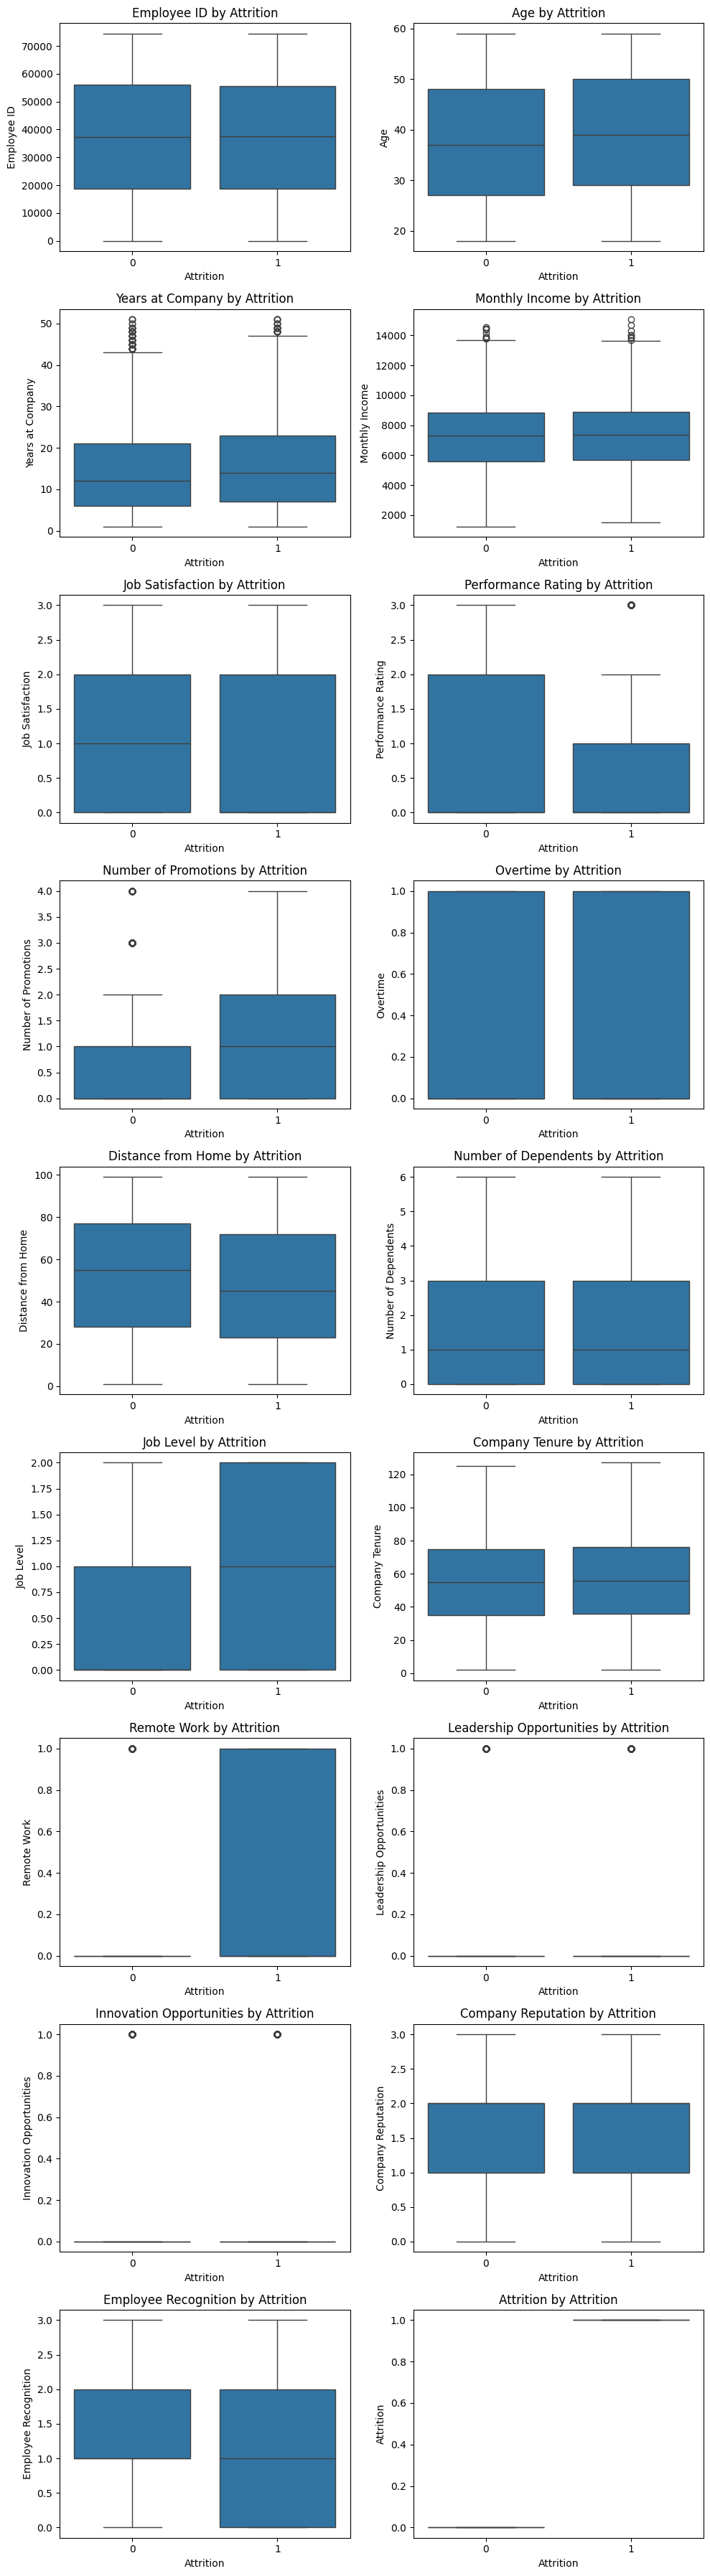

In [67]:
# Check Outliers through Boxplots

import math

# Select Numeric Columns and exclude boolean and Categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# # Create a boxplot as Subplot for numeric_cols
# plt.figure(figsize=(15, 10))
# for i, col in enumerate(numeric_cols):
#     plt.subplot(2, 3, i + 1)
#     sns.boxplot(y=df[col])
#     plt.title(f'Boxplot of {col}')
# plt.tight_layout()
# plt.show()


n = len(numeric_cols)
rows = math.ceil(n / 2)   # 3 plots per row
cols = 2

plt.figure(figsize=(5*cols, 4*rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols, i+1)
    sns.boxplot(x="Attrition", y=col, data=df)
    plt.title(f'{col} by Attrition')

plt.tight_layout()
plt.show()

In [68]:
df

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,0,0,1,...,1,1,Large,22,0,0,0,3,2,1
1,30585,35,Male,7,Education,4563,Good,0,0,1,...,4,0,Medium,27,0,0,0,2,0,0
2,54656,50,Male,7,Education,5583,Fair,0,0,3,...,2,2,Medium,76,0,0,1,2,1,1
3,33442,58,Male,44,Media,5525,Fair,3,2,0,...,4,0,Medium,96,0,0,0,3,1,0
4,15667,39,Male,24,Education,4604,Good,0,0,0,...,6,1,Large,45,1,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,16243,56,Female,42,Healthcare,7830,Poor,2,0,0,...,0,2,Medium,60,0,0,0,3,2,1
14896,47175,30,Female,15,Education,3856,Good,2,0,2,...,0,0,Medium,20,0,0,0,2,2,0
14897,12409,52,Male,5,Education,5654,Good,3,1,0,...,4,1,Small,7,0,0,0,2,0,0
14898,9554,18,Male,4,Education,5276,Fair,0,0,0,...,3,1,Large,5,0,0,0,3,0,1


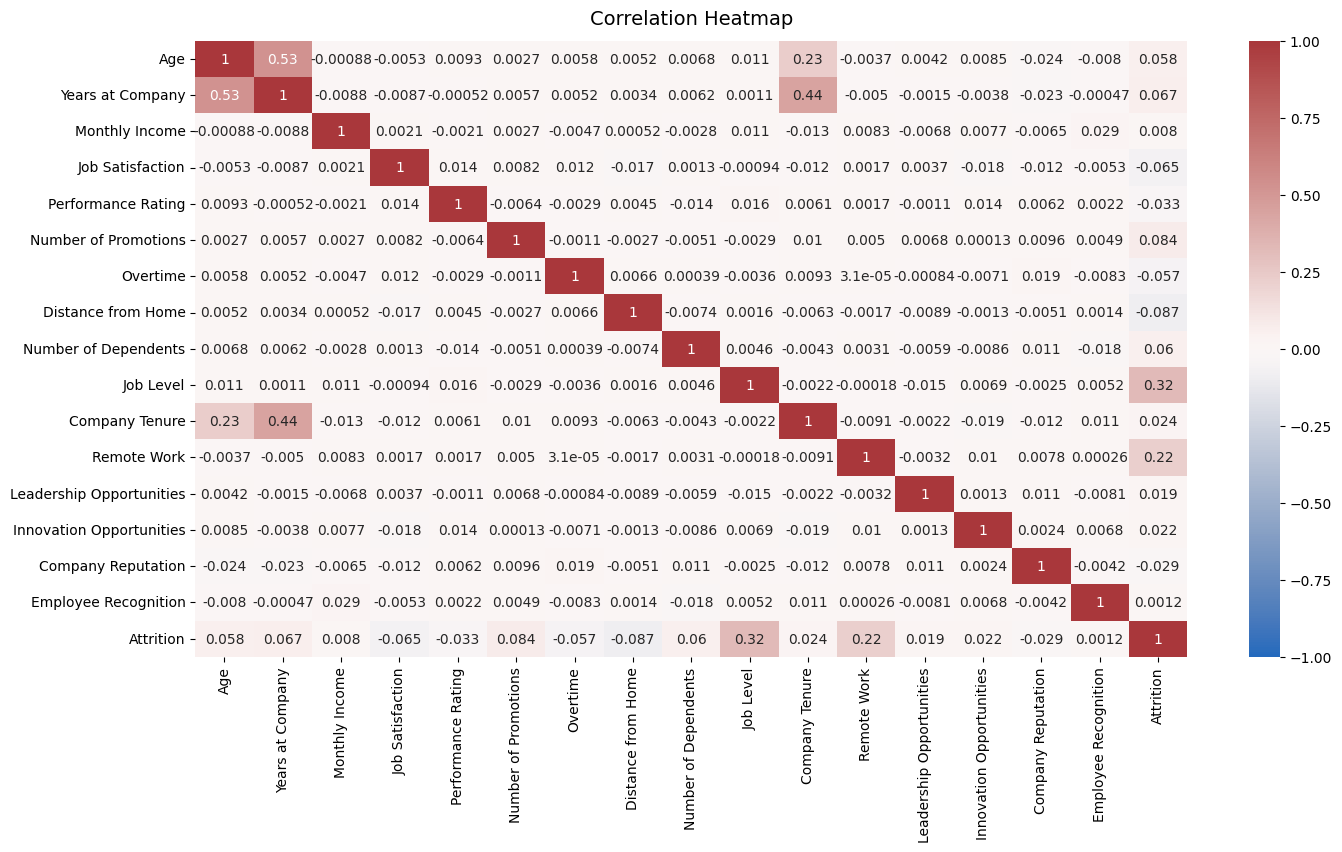

In [69]:
# Plot a correlation heatmap


# Prepare data for heatmap
df_heat = df.copy()
df_heat = df_heat.drop(columns=['Employee ID'])
# Drop all object (string/categorical) columns
df_heat = df_heat.drop(columns=df_heat.select_dtypes(include=['object']).columns)




# Plot heatmap
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(df_heat.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)
plt.show()

In [70]:
# Spearman Correlation Analysis Between DV and IVS
from scipy import stats

# Define DV and IVS
dv_spearman = df['Attrition']
iv_spearman = df.copy()
iv_spearman = iv_spearman.drop(columns=['Employee ID','Attrition'])
iv_spearman = iv_spearman.drop(columns=iv_spearman.select_dtypes(include=['object']).columns)


# # Compute Spearman correlations for all IVs × all DV
corr_table = []
for col in iv_spearman.columns:
    rho, pval = stats.spearmanr(iv_spearman[col], dv_spearman)
    corr_table.append({
        'IV': col,
        'DV': 'left',
        'Spearman_rho': rho,
        'p_value': pval
    })

# Convert to DataFrame
corr_df = pd.DataFrame(corr_table)

# Display correlation table
corr_df=corr_df.sort_values(by="Spearman_rho", ascending=False)
corr_df

,IV,DV,Spearman_rho,p_value
9,Job Level,left,0.318207,0.000000e+00
11,Remote Work,left,0.224174,4.590871e-169
1,Years at Company,left,0.073658,2.204837e-19
5,Number of Promotions,left,0.062950,1.459650e-14
0,Age,left,0.058628,7.946831e-13
8,Number of Dependents,left,0.049135,1.963807e-09
10,Company Tenure,left,0.022244,6.619739e-03
13,Innovation Opportunities,left,0.021626,8.292313e-03
12,Leadership Opportunities,left,0.019171,1.927587e-02
2,Monthly Income,left,0.008477,3.008236e-01


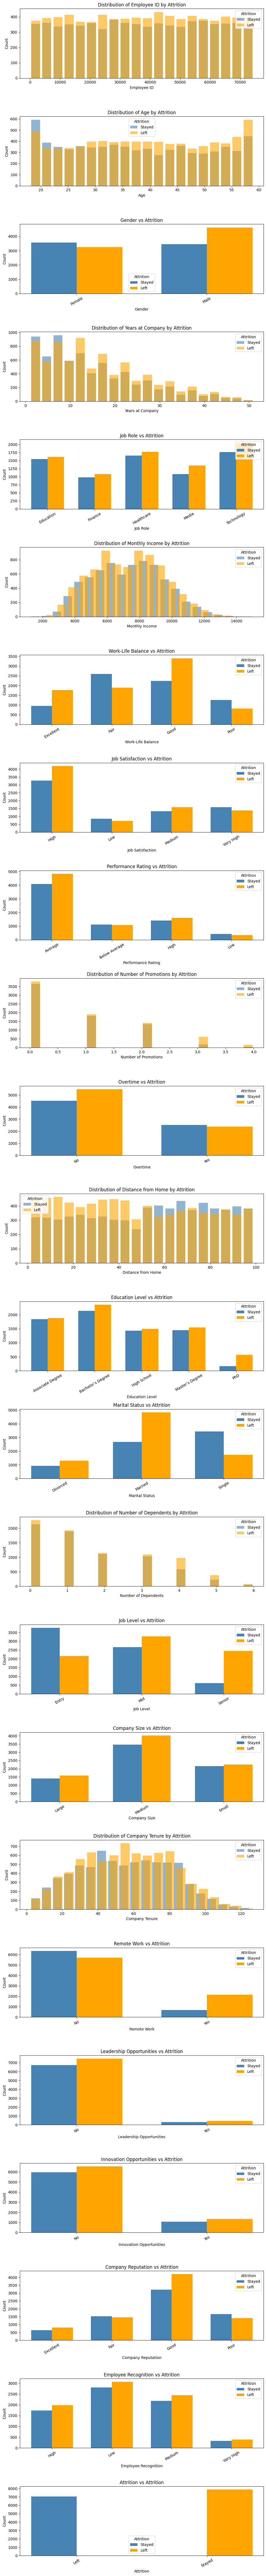

In [71]:
# Univariate Analysis for Numeric and Categorical Variables

target = "Attrition"
# cols = [
#     "Job Level",
#     "Remote Work",
#     "Years at Company",
#     "Number of Promotions",
#     "Age",
#     "Gender",
#     # "Number of Dependents",
#     # "Company Tenure",
#     "Innovation Opportunities",
#     "Leadership Opportunities",
#     # "Monthly Income",
#     "Employee Recognition",
#     "Company Reputation",
#     "Performance Rating",
#     "Overtime",
#     "Job Satisfaction",
#     # "Distance from Home"
# ]

cols=df0.columns

n_rows = len(cols)
fig, axes = plt.subplots(n_rows, 1, figsize=(10, 4*n_rows))

for ax, col in zip(axes, cols):
    if pd.api.types.is_numeric_dtype(df0[col]):
        # Numeric: histogram split by target
        # for label, color in zip([0,1], ["steelblue", "orange"]):
        #     subset = df[df0[target]==label][col]
        #     ax.hist(subset, bins=20, alpha=0.6,
        #             label="Stayed" if label==0 else "Left",
        #             color=color, rwidth=0.8)
        # ax.set_xlabel(col)
        # ax.set_ylabel("Count")
        # ax.set_title(f"Distribution of {col} by {target}")
        # ax.legend(title="Attrition")
          for label, color in zip([0, 1], ["steelblue", "orange"]):
            subset = df[df[target] == label][col]
            ax.hist(
            subset, bins=20, alpha=0.6,
            label="Stayed" if label == 0 else "Left",
            color=color, rwidth=0.8
            )
          ax.set_xlabel(col)
          ax.set_ylabel("Count")
          ax.set_title(f"Distribution of {col} by {target}")
          ax.legend(title="Attrition")
    else:
        # Categorical: bar chart
        counts = pd.crosstab(df0[col], df0[target])
        categories = counts.index.astype(str)

        x = np.arange(len(categories))
        width = 0.35

        # use .iloc instead of direct [0]/[1]
        ax.bar(x - width/2, counts.iloc[:,0], width, label="Stayed", color="steelblue")
        ax.bar(x + width/2, counts.iloc[:,1], width, label="Left", color="orange")

        ax.set_xticks(x)
        ax.set_xticklabels(categories, rotation=30)
        ax.set_xlabel(col)
        ax.set_ylabel("Count")
        ax.set_title(f"{col} vs {target}")
        ax.legend(title="Attrition")

plt.tight_layout()
plt.show()

In [ ]:
# print("Years at Company",df0['Years at Company'].unique())
# print("Age",df0['Age'].unique())


# cols=df0.columns

# for ax, col in zip(axes, cols):
#     if pd.api.types.is_numeric_dtype(df0[col]):
#        print(col,df0[col].unique(),"\n")


In [72]:
df0

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0,...,0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
14896,47175,30,Female,15,Education,3856,Good,Medium,Average,2,...,0,Entry,Medium,20,No,No,No,Good,Medium,Left
14897,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0,...,4,Mid,Small,7,No,No,No,Good,High,Left
14898,9554,18,Male,4,Education,5276,Fair,High,Average,0,...,3,Mid,Large,5,No,No,No,Poor,High,Stayed


In [73]:
df_model = df0.copy()

# df_model['Job Level'] = df_model['average_montly_hours']
# df_model['overworked'] = (df_model['overworked'] > 160).astype(int)


df_model.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed


In [74]:

df_model = df_model.drop(columns=['Employee ID'])

In [ ]:
# features = [
#     "Age",
#     "Number of Dependents",
#     "Distance from Home",
#     "Years at Company",
#     "Job Satisfaction",
#     "Leadership Opportunities",
#     "Innovation Opportunities",
#     "Performance Rating",
#     "Number of Promotions",
#     "Monthly Income",
#     "Employee Recognition",
#     "Company Reputation",
#     "Overtime",
#     "Remote Work"
# ]

In [76]:
# 1. Split Features & Target

y = df_model['Attrition']
X = df_model.drop(columns='Attrition')

print(y.head())
print ('--' * 10)
X.head()

0    Stayed
1      Left
2    Stayed
3      Left
4    Stayed
Name: Attrition, dtype: object
--------------------


,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition
0,36,Male,13,Healthcare,8029,Excellent,High,Average,1,Yes,...,Married,1,Mid,Large,22,No,No,No,Poor,Medium
1,35,Male,7,Education,4563,Good,High,Average,1,Yes,...,Single,4,Entry,Medium,27,No,No,No,Good,High
2,50,Male,7,Education,5583,Fair,High,Average,3,Yes,...,Divorced,2,Senior,Medium,76,No,No,Yes,Good,Low
3,58,Male,44,Media,5525,Fair,Very High,High,0,Yes,...,Single,4,Entry,Medium,96,No,No,No,Poor,Low
4,39,Male,24,Education,4604,Good,High,Average,0,Yes,...,Married,6,Mid,Large,45,Yes,No,No,Good,High


In [77]:
# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [78]:
# 3. Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numeric Features:", numeric_features)
print("Categorical Features:", categorical_features)

Numeric Features: ['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 'Distance from Home', 'Number of Dependents', 'Company Tenure']
Categorical Features: ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition']


In [79]:
# 4. Preprocessing

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [80]:
# Random Forest Classifier

pipeline_rf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(random_state=42))
])

In [81]:
%%time

# Fit the pipeline to the training data
pipeline_rf.fit(X_train, y_train)

CPU times: user 2.09 s, sys: 11.3 ms, total: 2.1 s
Wall time: 2.11 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Years at Company',
                                                   'Monthly Income',
                                                   'Number of Promotions',
                                                   'Distance from Home',
                                                   'Number of Dependents',
                                                   'Company Tenure']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender', 'Job Role',
                                                   'Work-Life Balance',
                                                   'Job Satisfaction',
                                                   'Performance Rating',
                                                   'Overtime',
                                                   'Education Level',
                                                   'Marital Status',
                                                   'Job Level', 'Company Size',
                                                   'Remote Work',
                                                   'Leadership Opportunities',
                                                   'Innovation Opportunities',
                                                   'Company Reputation',
                                                   'Employee Recognition'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [82]:
# Make predictions on the training and test data
y_training_pred_rf = pipeline_rf.predict(X_train)
y_test_pred_rf = pipeline_rf.predict(X_test)

In [83]:
# Calculate accuracy score on both training and test sets
train_accuracy_rf = accuracy_score(y_train, y_training_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

# Calculate the gap between training and test accuracy
accuracy_gap_rf = (train_accuracy_rf - test_accuracy_rf) * 100

print(f"Accuracy Score on Training Data: {train_accuracy_rf:.4f}")
print(f"Accuracy Score on Test Data: {test_accuracy_rf:.4f}")
print(f"Gap between Training and Test Accuracy: {accuracy_gap_rf:.2f}%")

Accuracy Score on Training Data: 1.0000
Accuracy Score on Test Data: 0.7409
Gap between Training and Test Accuracy: 25.91%


In [84]:
# Calculate Classification Report and Confusion Matrix
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred_rf))

print ("--" * 30)
print("\nConfusion Matrix on Test Data:")
print(confusion_matrix(y_test, y_test_pred_rf))


Classification Report on Test Data:
              precision    recall  f1-score   support

        Left       0.72      0.73      0.73      1755
      Stayed       0.76      0.75      0.75      1970

    accuracy                           0.74      3725
   macro avg       0.74      0.74      0.74      3725
weighted avg       0.74      0.74      0.74      3725

------------------------------------------------------------

Confusion Matrix on Test Data:
[[1287  468]
 [ 497 1473]]


In [86]:
# Baseline Accuracy Calculation numpy array format and compare to model test accuracy
from sklearn.preprocessing import LabelEncoder

# Encode y_test_pred_rf into integers
le = LabelEncoder()
y_test_pred_rf_encoded = le.fit_transform(y_test_pred_rf)

# Baseline = majority class accuracy
baseline_accuracy_rf = np.mean(y_test_pred_rf_encoded == np.bincount(y_test_pred_rf_encoded).argmax())
print(f"Baseline (Majority Class) Accuracy RF: {baseline_accuracy_rf:.4f}")

# Compare with your model accuracy
model_accuracy_rf = (test_accuracy_rf - baseline_accuracy_rf) * 100
print(f"Improvement over baseline: {model_accuracy_rf:.2f}%")


Baseline (Majority Class) Accuracy RF: 0.5211
Improvement over baseline: 21.99%


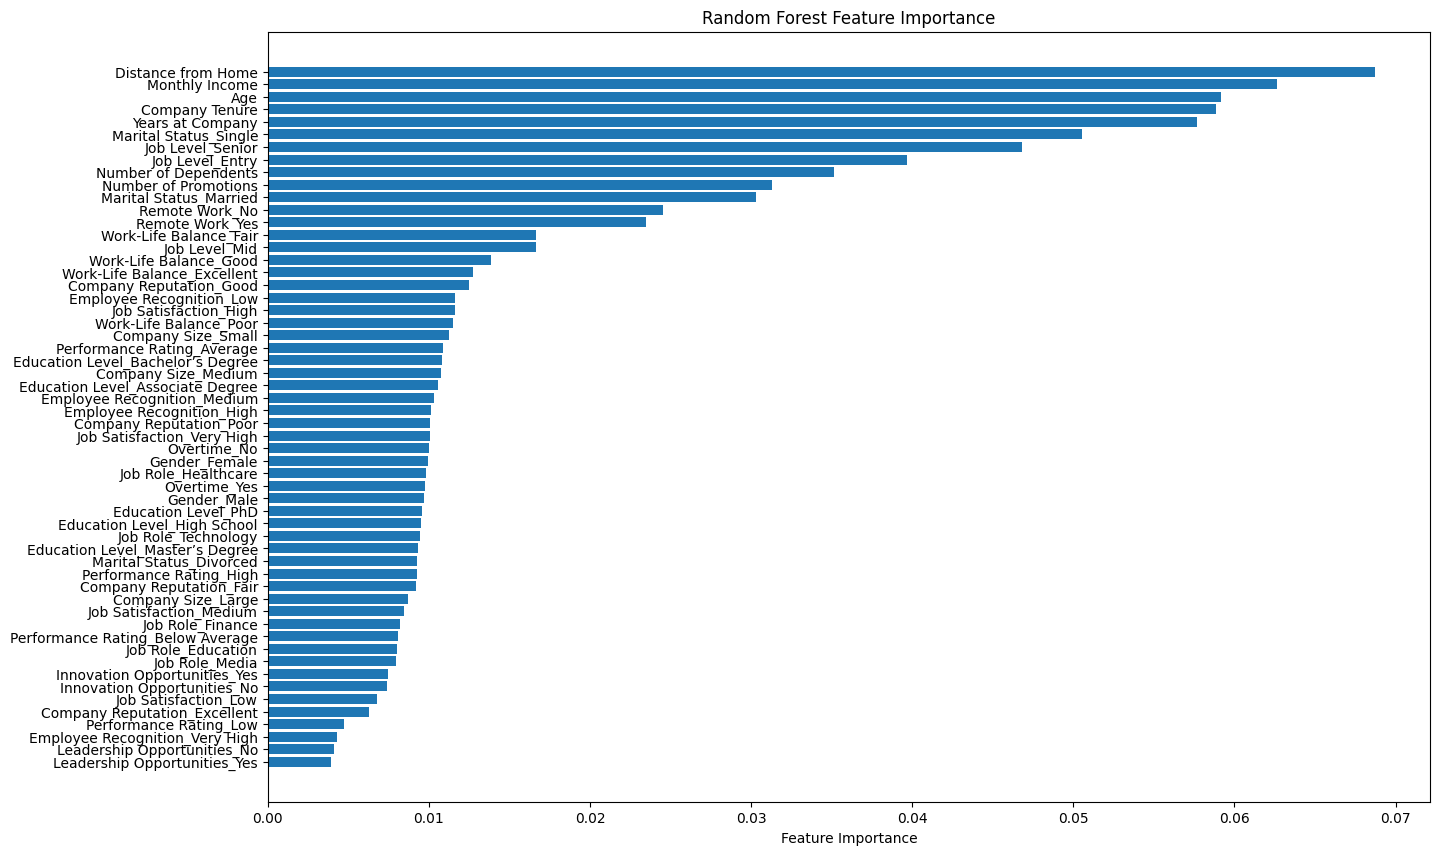

In [89]:
# Feature Importance Visualization of Random Forest

# Get trained RF model
rf_model = pipeline_rf.named_steps['model']

# Get feature names after preprocessing
ohe = pipeline_rf.named_steps['preprocessor'].named_transformers_['cat']
cat_features = ohe.get_feature_names_out(categorical_features)
all_features = np.concatenate([numeric_features, cat_features])

# Feature importance
feature_importances = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importances)
pos = np.arange(sorted_idx.shape[0]) + 0.6

# Plot
plt.figure(figsize=(15, 10))
plt.barh(pos, feature_importances[sorted_idx], align='center')
plt.yticks(pos, [all_features[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title("Random Forest Feature Importance")
plt.show()

In [106]:
y_test


,Attrition
8765,Stayed
9158,Left
8093,Left
10074,Stayed
2894,Stayed
...,...
3441,Left
5813,Left
8278,Stayed
8382,Left


In [109]:
# Xgboost Classifier

from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

# Convert arrays to Series
y_test_s  = pd.Series(y_test)

# Fit label encoder on both
le = LabelEncoder()
le.fit(pd.concat([y_test_s]))

# Transform
y_test_enc  = le.transform(y_test_s)

print("Classes:", le.classes_)

# Define pipeline
pipeline_xgb = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss"))
])


Classes: ['Left' 'Stayed']


In [110]:
%%time

# Fit the pipeline to the training data
pipeline_xgb.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:18:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


CPU times: user 790 ms, sys: 1.37 ms, total: 791 ms
Wall time: 457 ms


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Years at Company',
                                                   'Monthly Income',
                                                   'Number of Promotions',
                                                   'Distance from Home',
                                                   'Number of Dependents',
                                                   'Company Tenure']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender', 'Job Role'...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [111]:
# Make predictions on the training and test data
y_training_pred_xgb = pipeline_xgb.predict(X_train)
y_test_pred_xgb = pipeline_xgb.predict(X_test)

In [113]:
# Calculate accuracy score on both training and test sets
train_accuracy_xgb = accuracy_score(y_train, y_training_pred_xgb)
test_accuracy_xgb = accuracy_score(y_test_enc, y_test_pred_xgb)

# Calculate the gap between training and test accuracy
accuracy_gap_xgb = (train_accuracy_xgb - test_accuracy_xgb) * 100

print(f"Accuracy Score on Training Data: {train_accuracy_xgb:.4f}")
print(f"Accuracy Score on Test Data: {test_accuracy_xgb:.4f}")
print(f"Gap between Training and Test Accuracy: {accuracy_gap_xgb:.2f}%")

Accuracy Score on Training Data: 0.9497
Accuracy Score on Test Data: 0.7302
Gap between Training and Test Accuracy: 21.95%


In [116]:
# Calculate Classification Report and Confusion Matrix of Xgboost
print("\nClassification Report on Test Data:")
print(classification_report(y_test_enc, y_test_pred_xgb))

print ("--" * 30)
print("\nConfusion Matrix on Test Data:")
print(confusion_matrix(y_test_enc, y_test_pred_xgb))


Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.71      0.72      0.71      1755
           1       0.75      0.74      0.74      1970

    accuracy                           0.73      3725
   macro avg       0.73      0.73      0.73      3725
weighted avg       0.73      0.73      0.73      3725

------------------------------------------------------------

Confusion Matrix on Test Data:
[[1258  497]
 [ 508 1462]]


In [117]:
# Baseline Accuracy Calculation numpy array format and compare to model test accuracy
baseline_accuracy_xgb = np.mean(y_test_pred_xgb == np.bincount(y_test_pred_xgb).argmax())
print(f"Baseline (Majority Class) Accuracy XGB: {baseline_accuracy_xgb:.4f}")

model_accuracy_xgb = (test_accuracy_xgb - baseline_accuracy_xgb) * 100
print(f"Model Accuracy over Baseline XGB: {model_accuracy_xgb:.2f}%")

Baseline (Majority Class) Accuracy XGB: 0.5259
Model Accuracy over Baseline XGB: 20.43%


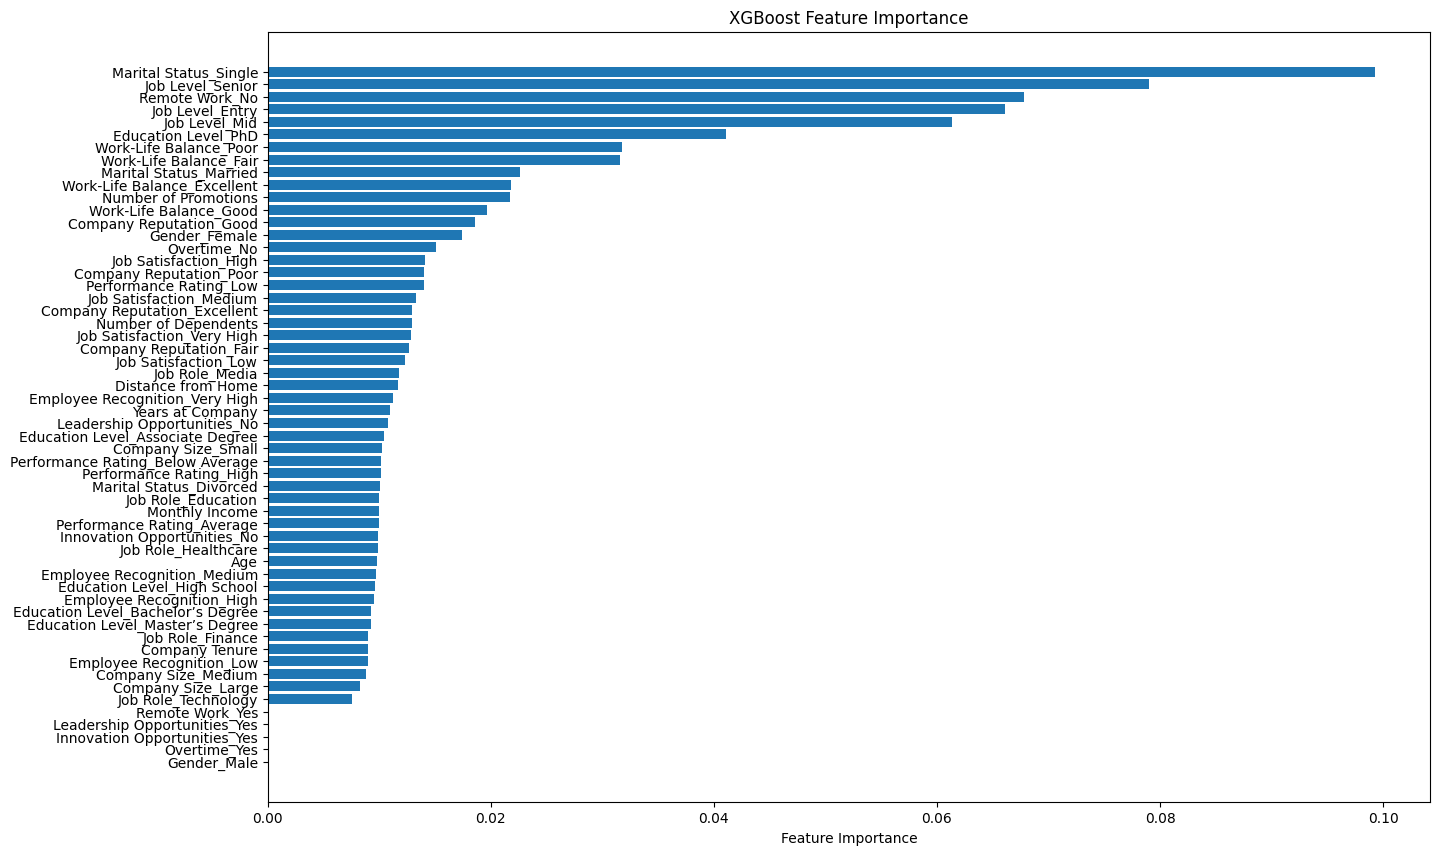

In [120]:
# Feature Importance Visualization of XGBoost

# Get trained XGBoost model
xgb_model = pipeline_xgb.named_steps['model']

# Get feature names after preprocessing
ohe = pipeline_xgb.named_steps['preprocessor'].named_transformers_['cat']
cat_features = ohe.get_feature_names_out(categorical_features)
all_features = np.concatenate([numeric_features, cat_features])

# Feature importance
feature_importances = xgb_model.feature_importances_
sorted_idx = np.argsort(feature_importances)
pos = np.arange(sorted_idx.shape[0]) + 0.6

# Plot
plt.figure(figsize=(15, 10))
plt.barh(pos, feature_importances[sorted_idx], align='center')
plt.yticks(pos, [all_features[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title("XGBoost Feature Importance")
plt.show()

In [121]:
# Comparison Table

comparison_table = pd.DataFrame({
    ("Model", ""): ["Random Forest", "XGBoost"],
    ("Train", "Accuracy"): [train_accuracy_rf, train_accuracy_xgb],
    ("Test", "Accuracy"): [test_accuracy_rf, test_accuracy_xgb],
    ("Accuracy", " Gap %"): [accuracy_gap_rf, accuracy_gap_xgb],
    ("Model Accuracy", "over Baseline %"): [model_accuracy_rf, model_accuracy_xgb]
})

comparison_table.columns = pd.MultiIndex.from_tuples(comparison_table.columns)
comparison_table

,Model,Train,Test,Accuracy,Model Accuracy
,,Accuracy,Accuracy,Gap %,over Baseline %
0,Random Forest,1.000000,0.740940,25.906040,21.986577
1,XGBoost,0.949709,0.730201,21.950783,20.429530
